In [ ]:
# Extract samples generated from Milestone3_Notebook.ipynb.
!pip install pyspark
!tar -xf sample0_2.tar.gz
!tar -xf sample1_2.tar.gz
!tar -xf sample2_2.tar.gz
!tar -xf sample3_2.tar.gz
!tar -xf sample4_2.tar.gz
!tar -xf sample5_2.tar.gz
!tar -xf sample6_2.tar.gz
!tar -xf sample7_2.tar.gz

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
try:
  sc.stop()
except:
  pass
sc = SparkContext(master = 'local[3]')
ss = SparkSession(sc)

In [ ]:
# Create a dataframe for each sample and show the first one.
dfs = []
dfs.append(ss.createDataFrame(sc.pickleFile('./sample0_2')))
dfs[0].show(dfs[0].count())

+--------+--------------------+----+----------+--------------------+--------------------+------------------+-------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+-------------------+------+-------------------+-------+--------------------+-------------------+--------------------+-------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+-------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+-------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               title|rank|     

In [ ]:
# Append dataframes of the other samples.
sample_schema = dfs[0].schema
for i in range(1, 8):
  dfs.append(ss.createDataFrame(sc.pickleFile('./sample' + str(i) + '_2'),
                                schema = sample_schema))

In [ ]:
dfs[1].show(dfs[1].count())

+--------+--------------------+-----+----------+--------------------+--------------------+------------------+-------+-------------+--------------------+--------------------------+----------+-----------+--------+------------+--------------------+-------------------+--------------------+------+-------------------+-------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+--------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+--------------------+--------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               tit

In [ ]:
dfs[2].show(dfs[2].count()) # One sample is NOT a cluster, this one can and
                            # should be ignored.

+--------+--------------------+----+----------+--------------------+--------------------+--------------------+-------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+-------------------+------+-------------------+-------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+-------------------+----------------+-------------------+------------------+----------------------+-----------------------+---------------------------+--------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               title|

In [ ]:
dfs[3].show(dfs[3].count())

+--------+--------------------+----+----------+--------------------+--------------------+--------------+-------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+------------------+------+-------------------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+--------------------+------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               title|rank|      date

In [ ]:
dfs[4].show(dfs[4].count())

+--------+--------------------+-----+----------+--------------------+--------------------+-------------+------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+------------------+-------------------+------+-------------------+-------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+-------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+--------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               title| rank|      d

In [ ]:
dfs[5].show(dfs[5].count())

+--------+--------------------+-----+----------+--------------------+--------------------+------------------+------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+-------------------+------+-------------------+-------+--------------------+-------------------+--------------------+-------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+-------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+-------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               title| rank|    

In [ ]:
dfs[6].show(dfs[6].count())

+--------+--------------------+-----+----------+--------------------+--------------------+--------------------+------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+------------------+------+-------------------+-------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+--------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               title| rank| 

In [ ]:
dfs[7].show(dfs[7].count())

+--------+--------------------+-----+----------+--------------------+--------------------+--------------+------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+------------------+------+-------------------+-------+--------------------+--------------------+--------------------+-------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+-------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|      ID|               title| rank|      dat

In [ ]:
# Unify samples.

all_samples = ss.createDataFrame([], schema = sample_schema)
for i in range(8):
  all_samples = all_samples.union(dfs[i])
all_samples = all_samples.cache()

In [ ]:
# Let's refine the above mechanism. For simplicity, we first make a fairly
# reasonable preliminary assumption that the latent variable which the clusters
# seek to describe may be well-parameterized by audio features alone.

from pyspark.sql import functions as F

using_af = [feat for feat in dfs[0].columns if feat == 'prediction' or
 (feat.startswith('af_') and feat.endswith('_imputed'))]
# Get audio feature data, excluding faulty cluster 2.
afeat_df = all_samples.select(using_af).where(F.col('prediction') != 2).toPandas()

In [ ]:
afeat_df

,af_danceability_imputed,af_energy_imputed,af_key_imputed,af_loudness_imputed,af_mode_imputed,af_speechiness_imputed,af_acousticness_imputed,af_instrumentalness_imputed,af_liveness_imputed,af_valence_imputed,af_tempo_imputed,af_time_signature_imputed,prediction
0,0.732,0.463,11.0,-6.972,0.0,0.0287,0.3740,0.000000,0.1940,0.397,95.971001,4.0,0
1,0.609,0.394,10.0,-10.216,1.0,0.0270,0.6310,0.017973,0.1080,0.388,142.033997,4.0,0
2,0.731,0.573,4.0,-10.059,0.0,0.0544,0.4010,0.017973,0.1130,0.145,109.928001,4.0,0
3,0.778,0.317,1.0,-10.732,0.0,0.3340,0.5920,0.000000,0.0881,0.327,140.048004,4.0,0
4,0.732,0.463,11.0,-6.972,0.0,0.0287,0.3740,0.000000,0.1940,0.397,95.971001,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.627,0.675,5.0,-7.125,0.0,0.2130,0.1250,0.000000,0.0784,0.961,79.309998,4.0,7
265,0.658,0.678,1.0,-4.407,1.0,0.0580,0.3030,0.000000,0.3610,0.662,97.975998,4.0,7
266,0.897,0.813,6.0,-3.653,0.0,0.1520,0.5410,0.000000,0.1380,0.892,130.050995,4.0,7
267,0.773,0.757,1.0,-4.959,1.0,0.0526,0.0864,0.017973,0.0727,0.858,88.005997,4.0,7


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
feat_spans = [afeat_df.describe().loc[['min', 'max'], col] for col in
              afeat_df.columns]

In [ ]:
hyparam = 10
pd.DataFrame(np.array([np.linspace(item[0], item[1], num = hyparam) for item in
                       np.array(feat_spans, dtype = float)]), index = afeat_df.columns)

,0,1,2,3,4,5,6,7,8,9
af_danceability_imputed,0.184000,0.266444,0.348889,0.431333,0.513778,0.596222,0.678667,0.761111,0.843556,0.926000
af_energy_imputed,0.017000,0.125444,0.233889,0.342333,0.450778,0.559222,0.667667,0.776111,0.884556,0.993000
af_key_imputed,0.000000,1.222222,2.444444,3.666667,4.888889,6.111111,7.333333,8.555556,9.777778,11.000000
af_loudness_imputed,-22.542000,-19.855778,-17.169555,-14.483333,-11.797111,-9.110889,-6.424667,-3.738444,-1.052222,1.634000
af_mode_imputed,0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000
af_speechiness_imputed,0.023200,0.076067,0.128933,0.181800,0.234667,0.287533,0.340400,0.393267,0.446133,0.499000
af_acousticness_imputed,0.000222,0.110753,0.221284,0.331815,0.442346,0.552876,0.663407,0.773938,0.884469,0.995000
af_instrumentalness_imputed,0.000000,0.106222,0.212444,0.318667,0.424889,0.531111,0.637333,0.743556,0.849778,0.956000
af_liveness_imputed,0.021500,0.094667,0.167833,0.241000,0.314167,0.387333,0.460500,0.533667,0.606833,0.680000
af_valence_imputed,0.038100,0.140644,0.243189,0.345733,0.448278,0.550822,0.653367,0.755911,0.858456,0.961000


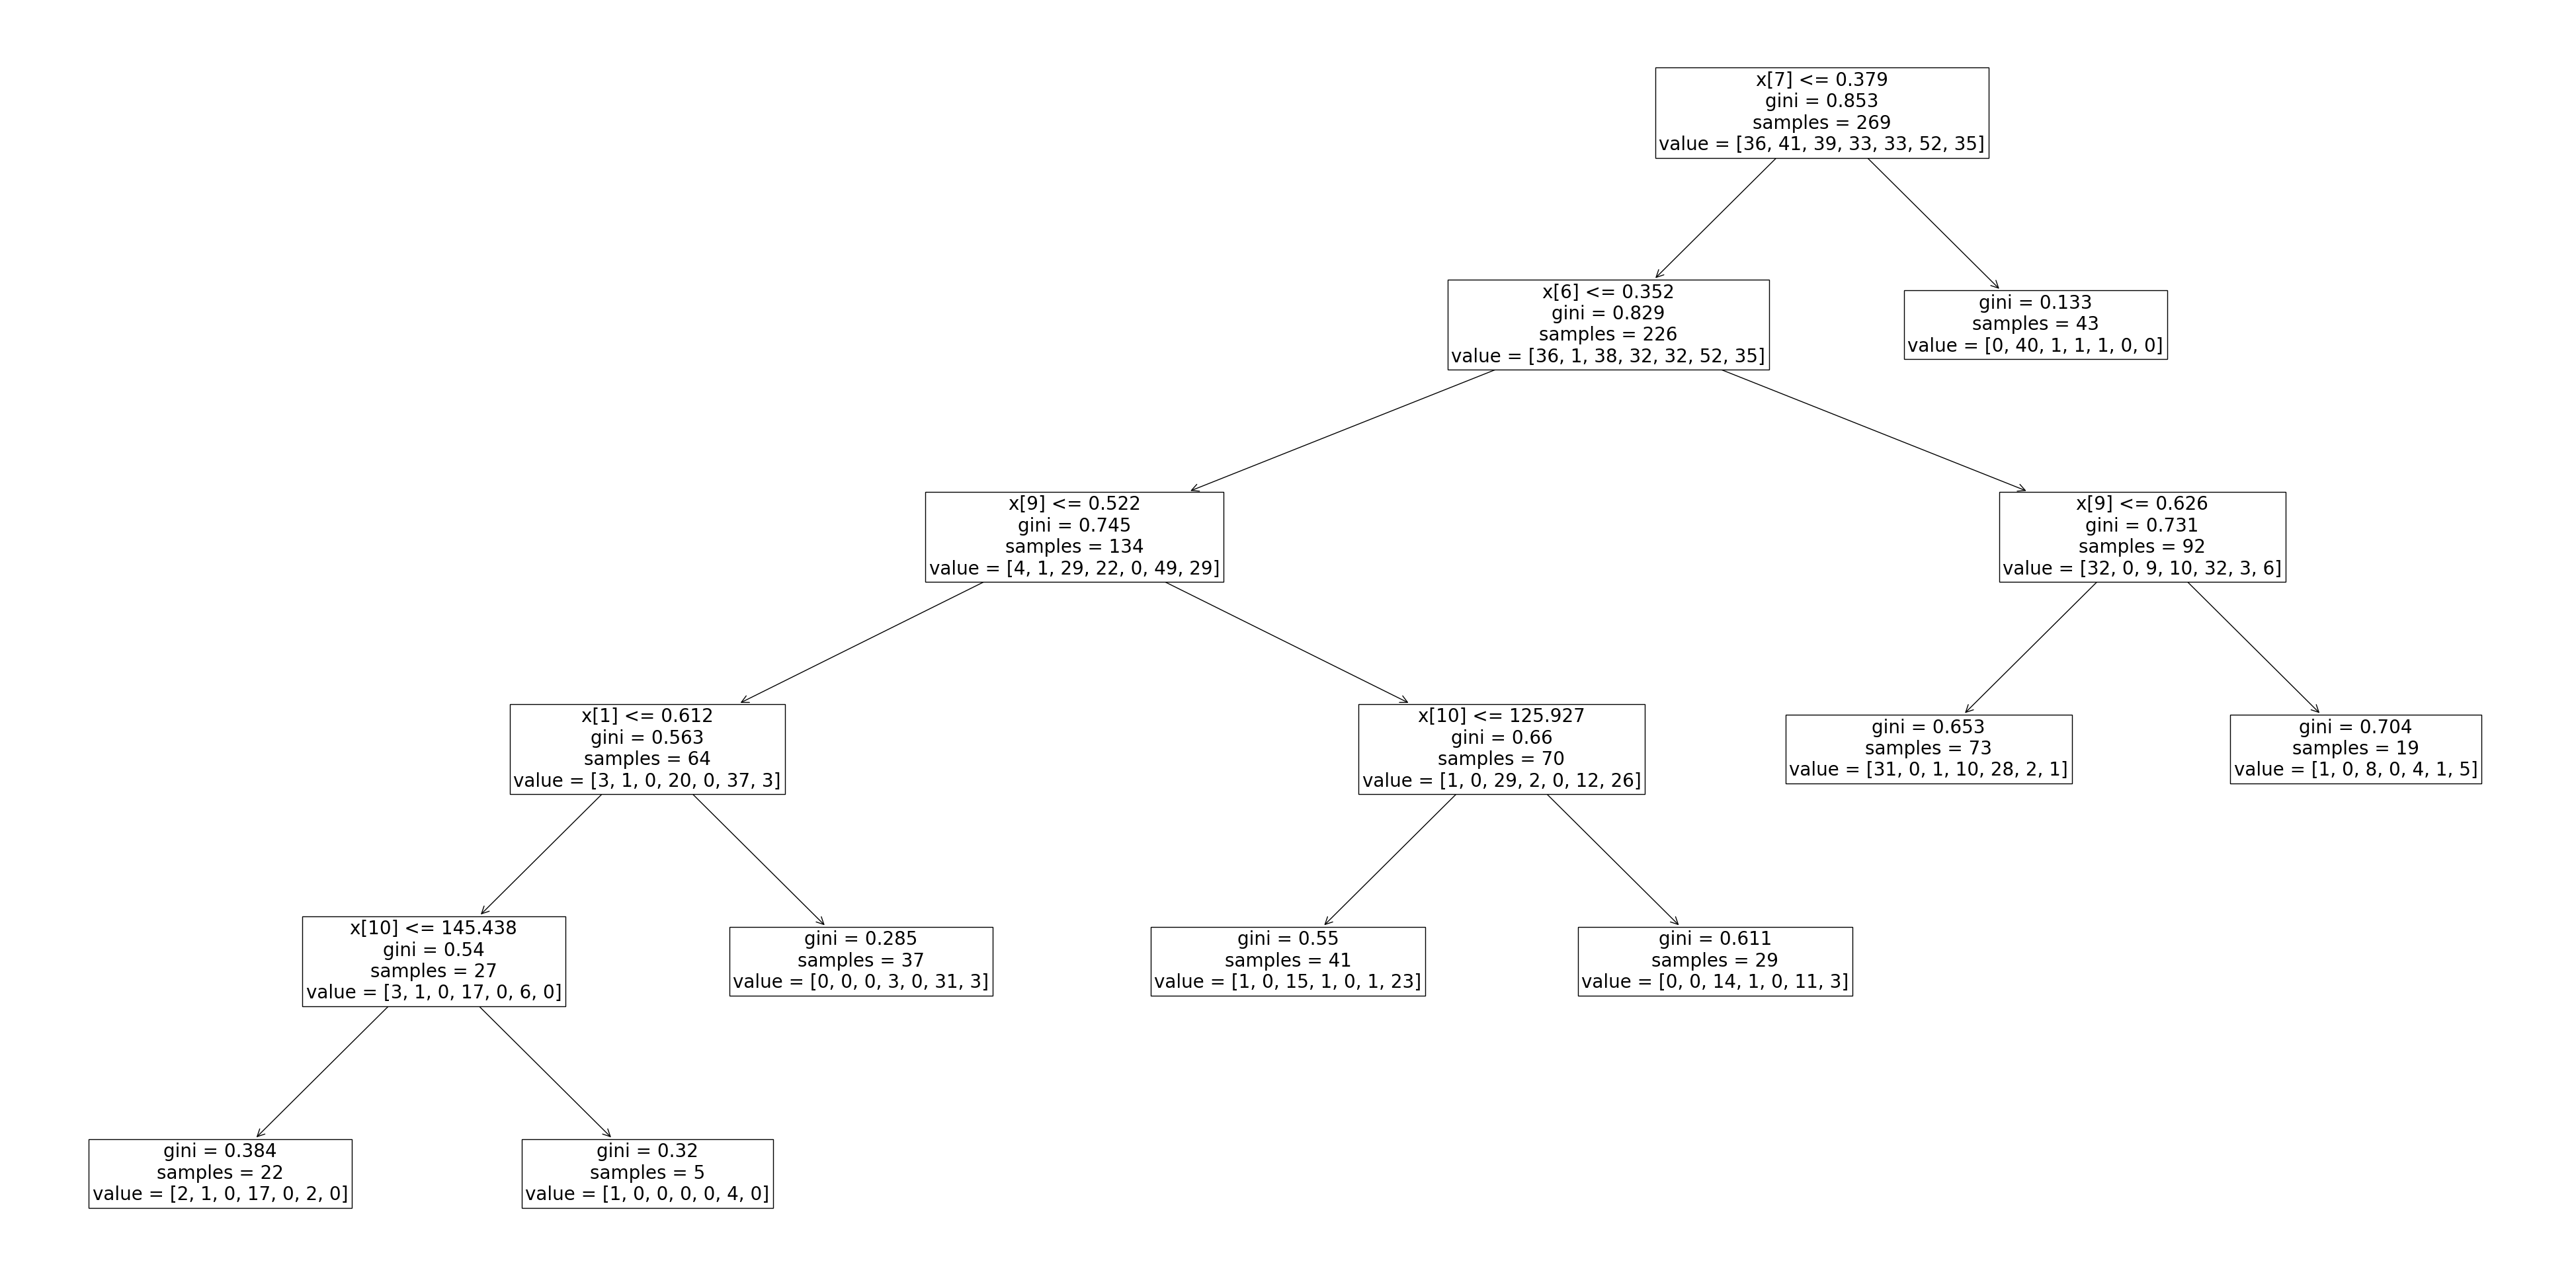

In [ ]:
# We can just run a decision tree classifier on our newly machine-labeled sample
# collection and extract a description of it!

import matplotlib.pyplot as plt
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes = 8).fit(afeat_df.iloc[:, :-1],
                                                          afeat_df.iloc[:, -1])
fig, ax = plt.subplots(1, 1, figsize = (50, 25))
tree.plot_tree(clf, ax = ax, fontsize = 20);

In [ ]:
predictions = clf.predict(afeat_df.iloc[:, :-1])
results = pd.DataFrame([predictions == np.array(afeat_df.iloc[:, -1]),
                        np.array(afeat_df.iloc[:, -1])],
                       index = ['predicted', 'actual']).T
for item in results.groupby('actual'):
  print(item[1])

   predicted actual
0       True      0
1       True      0
2       True      0
3       True      0
4       True      0
5       True      0
6       True      0
7      False      0
8       True      0
9       True      0
10      True      0
11     False      0
12      True      0
13      True      0
14      True      0
15      True      0
16      True      0
17      True      0
18      True      0
19      True      0
20      True      0
21      True      0
22      True      0
23      True      0
24      True      0
25      True      0
26      True      0
27      True      0
28      True      0
29     False      0
30     False      0
31     False      0
32      True      0
33      True      0
34      True      0
35      True      0
   predicted actual
36      True      1
37      True      1
38      True      1
39      True      1
40      True      1
41      True      1
42      True      1
43      True      1
44      True      1
45      True      1
46      True      1
47      True      1


From the above, it appears that while cluster 0 describes some miscellaneous theme/category, the other 5 all describe a very specific theme/category. Using the tree plot generated above, we may apply high-level human judgment to try to infer whether our clustering model has successfully extracted any meaningful themes/categories.